In [1]:
from io import BytesIO
import requests

import cv2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import pandas as pd

# load image for sample

In [50]:
sample = pd.read_csv('identifiers.csv', header=None)
doc = sample.iloc[8, 1]
url = doc+'/f1.highres.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

## transform image, check for blue border

-> R or G are less dominant, check whatever gives better results

give margin of 15, but is found empirically

In [51]:
img = Image.open(BytesIO(response.content)).convert('RGB')
img = np.array(img)

img2 = img.astype(np.float)

In [87]:
# average volor in that block

sample = pd.read_csv('identifiers.csv', header=None)

def get_image(doc):
    url = doc+'/f1.highres.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = np.array(img)
    return img


def image_median(img):
    return np.median(np.median(img, axis=1), axis=0)

colors = []

for doc in sample[1].sample(2):
    img = get_image(doc)
    h, w, d = img.shape
    
    #mid left of image
    avg_1 = img[int(w/2): int(w/2)+10, :10, :]
    avg_1 = image_median(avg_1)
    
    #mid right of image
    avg_2 = img[int(w/2): int(w/2)+10, -10:, :]
    avg_2 = image_median(avg_2)
    
    #mid top of image
    
    avg_3 = img[: 10, int(h/2):int(h/2)+10, :]
    avg_3 = image_median(avg_3)
    
    avg_color = np.median(np.median(img[0:10, 0:10, :], axis=1), axis=0)
    colors.append({'avg1': avg_1, 'avg2': avg_2, 'avg3': avg_3})
#    np.save('colors.npy', colors)

In [43]:
pd.read_csv('colors.csv')

,Unnamed: 0,source,avg1,avg2,avg3
0,0,https://gallica.bnf.fr/ark:/12148/btv1b53163492h,[165.5 162.5 147. ],[164.75 158.75 142.75],[164.25 162.25 148.5 ]
1,1,https://gallica.bnf.fr/ark:/12148/btv1b531634912,[147.25 121.25 94.25],[167.75 165. 149.5 ],[170.25 164. 148.75]
2,2,https://gallica.bnf.fr/ark:/12148/btv1b531638493,[147.25 131. 105. ],[159.5 150.5 133.5],[148. 124.75 97.75]
3,3,https://gallica.bnf.fr/ark:/12148/btv1b53164917p,[169.5 162.5 146.5],[160.75 148.25 131. ],[168. 159. 144.]
4,4,https://gallica.bnf.fr/ark:/12148/btv1b531688758,[156.5 157.5 145.75],[155.25 153.75 144. ],[154. 153.5 143.25]
...,...,...,...,...,...
3571,3571,https://gallica.bnf.fr/ark:/12148/btv1b53081795n,[153.75 151.25 139.25],[154. 150.75 137.5 ],[154.25 152.25 136.75]
3572,3572,https://gallica.bnf.fr/ark:/12148/btv1b53082008z,[149.75 147.75 136.75],[149. 148. 137.],[157.75 157. 145. ]
3573,3573,https://gallica.bnf.fr/ark:/12148/btv1b530918888,[142. 139.5 127. ],[145.5 140.75 126.5 ],[140.75 138.25 124.5 ]
3574,3574,https://gallica.bnf.fr/ark:/12148/btv1b530920461,[152.75 148.75 137.5 ],[155. 152.5 139.75],[156.5 154.5 139. ]


In [44]:
np.load('faces.npy')

array([[ 0.03028002, -0.01803273, -0.08243202, ...,  0.07057866,
         0.0280797 ,  0.0838033 ],
       [-0.016349  ,  0.01853211,  0.12863056, ...,  0.0255409 ,
         0.14096938,  0.11698866],
       [ 0.05189103,  0.23630495,  0.14117157, ..., -0.00103111,
         0.26501033,  0.00664255],
       ...,
       [-0.00969884,  0.15547238,  0.21973458, ...,  0.07937475,
         0.17989188,  0.05116516],
       [-0.00773717,  0.26591131,  0.05263809, ...,  0.02952703,
         0.16906513,  0.01459262],
       [-0.02368831, -0.0493298 , -0.05498865, ..., -0.02541093,
         0.07265193,  0.13186744]])

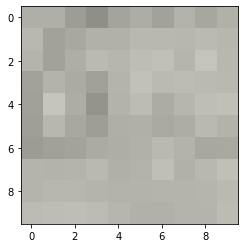

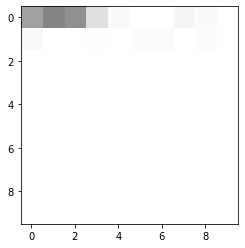

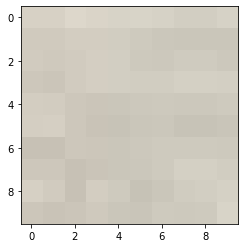

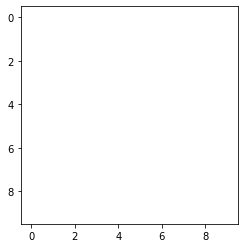

In [78]:
plt.imshow(img[0:10, 0:10, :])
plt.show()
plt.imshow(img[-10:, -10:, :])
plt.show()
plt.imshow(img[0:10, -10:, :])
plt.show()
plt.imshow(img[-10:, 0:10, :])

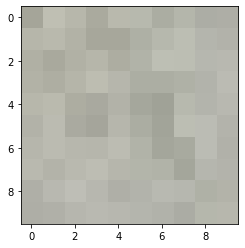

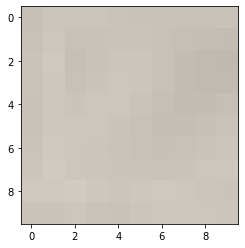

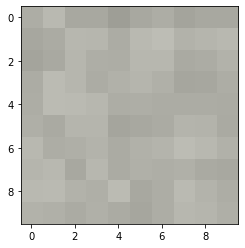

In [86]:
h, w, d = img.shape

plt.imshow(img[int(w/2): int(w/2)+10, :10, :])
plt.imshow(img[int(w/2): int(w/2)+10, -10:, :])
plt.imshow(img[: 10, int(h/2):int(h/2)+10, :])

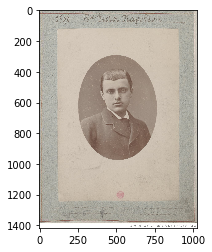

In [79]:
plt.imshow(img)

In [55]:
len(colors)

5909

In [56]:
colors_ = pd.Series(colors).apply(lambda x: pd.Series({'R': x[0], 'G': x[1], 'B': x[2]}))

In [58]:
colors_.to_csv('sample_colors.csv')

In [59]:
colors_

,R,G,B
0,170.50,164.50,149.75
1,147.00,123.00,95.75
2,141.75,136.75,130.75
3,167.00,161.00,145.00
4,151.75,152.25,143.00
...,...,...,...
5904,213.25,209.25,200.25
5905,175.25,180.25,176.25
5906,193.50,189.50,179.00
5907,176.25,178.50,174.25


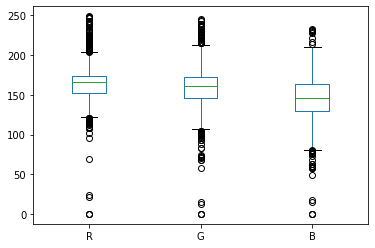

In [61]:
colors_.plot(kind='box')

In [71]:
sample.iloc[5904, 1]

'https://gallica.bnf.fr/ark:/12148/btv1b53123883t'

In [70]:
colors_[colors_.R.map(lambda x: x+10) > colors_.B]

,R,G,B
0,170.50,164.50,149.75
1,147.00,123.00,95.75
2,141.75,136.75,130.75
3,167.00,161.00,145.00
4,151.75,152.25,143.00
...,...,...,...
5904,213.25,209.25,200.25
5905,175.25,180.25,176.25
5906,193.50,189.50,179.00
5907,176.25,178.50,174.25


In [45]:
sample.iloc[47, 1]

'https://gallica.bnf.fr/ark:/12148/btv1b53151384m'

In [47]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

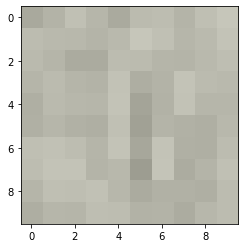

In [48]:
plt.imshow(img[0:10, 0:10, :])

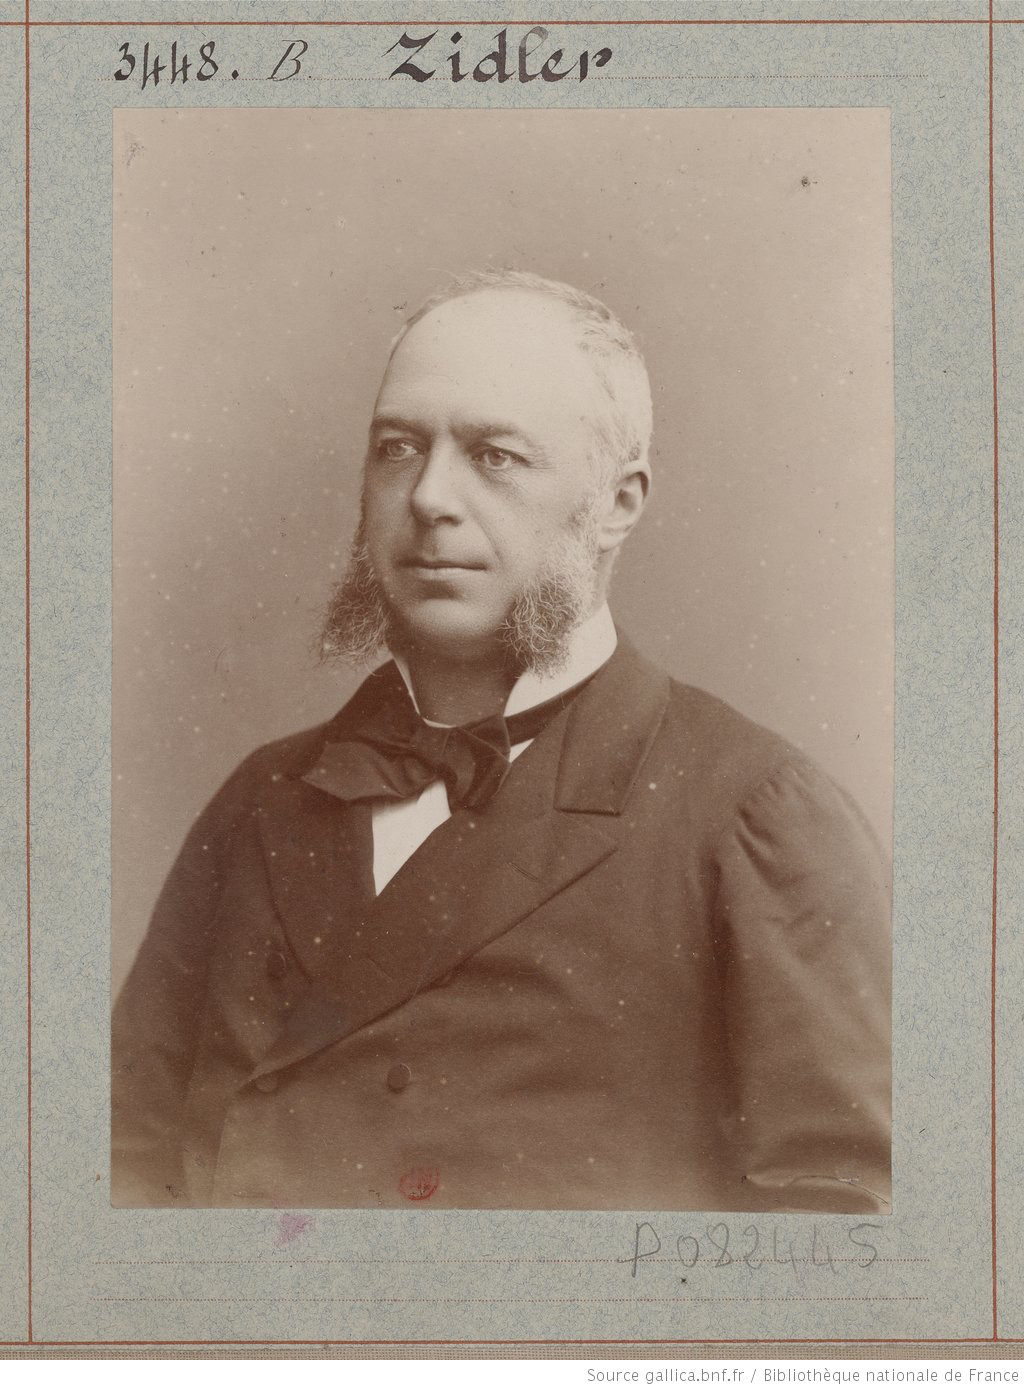

In [4]:
Image.open(BytesIO(response.content))

In [5]:
cond1 = (img2[:, :, 2] - img2[:, :, 0]) > -15
cond2 = (img2[:, :, 1] - img2[:, :, 0]) > -15

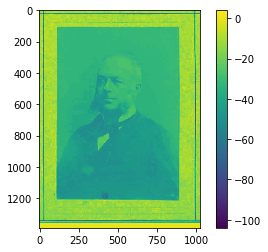

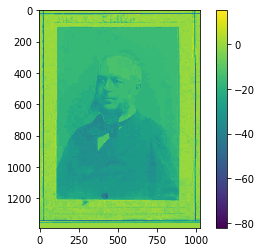

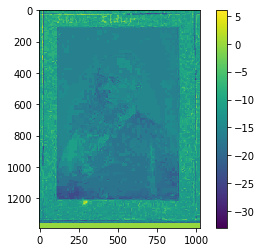

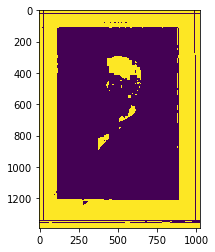

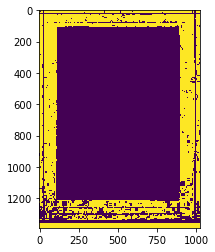

In [6]:
plt.imshow((img2[:, :, 2] - img2[:, :, 0]))
plt.colorbar()
plt.show()

plt.imshow((img2[:, :, 1] - img2[:, :, 0]))
plt.colorbar()
plt.show()

plt.imshow((img2[:, :, 2] - img2[:, :, 1]))
plt.colorbar()
plt.show()

plt.imshow(cond2)
plt.show()
plt.imshow(cond1)
plt.show()

# Example of functions used to extract 

In [7]:
src = np.where(cond1[:, :, None].repeat(3, axis=2), np.full_like(img, 255), img).astype(np.uint8)

In [26]:
def contourOK(img, cc):
    """Check if the contour is a good predictor of photo location."""
    if near_edge(img, cc): return False # shouldn't be near edges
    x, y, w, h = cv2.boundingRect(cc)
    if w < 100 or h < 100: return False # too narrow or wide is bad
    area = cv2.contourArea(cc)
    if area < (get_size(img) * 0.3): return False
    print(area)
    #if area < 200: return False
    return True

def near_edge(img, contour):
    """Check if a contour is near the edge in the given image."""
    x, y, w, h = cv2.boundingRect(contour)
    ih, iw = img.shape[:2]
    mm = 50 # margin in pixels
    return (x < mm
            or x + w > iw - mm
            or y < mm
            or y + h > ih - mm)

def white_percent(img):
    """Return the percentage of the thresholded image that's white."""
    w,h = img.shape
    newimg = np.where(img == 255, 1, 0)
    return sum(sum(newimg)) / (w*h)

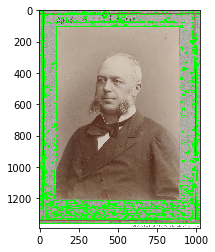

48 2
7 1
5 1
13 1
48 2
32 3
16 2
34 4
5 2
18 3
4 3
10 4
10 6
7 4
12 4
21 7
16 1
18 3
34 5
18 5
5 3
31 8
15 3
3 2
4 3
5 5
8 5
29 8
9 9
4 4
18 9
18 10
4 3
18 18
9 18
4 18
5 4
48 27
5 6
20 6
5 7
31 13
16 6
1 1
64 27
3 6
7 6
27 12
9 9
10 12
9 9
3 6
8 9
18 5
18 9
25 19
10 23
41 32
3 3
1 1
8 8
34 13
8 5
11 7
5 4
10 8
18 5
10 6
9 9
6 10
2 2
8 8
12 18
10 18
20 25
18 9
11 11
18 25
22 26
16 10
22 34
6 10
6 10
4 6
7 18
50 34
4 18
5 5
125 61
8 18
11 18
20 39
2 4
2 4
11 18
18 5
18 6
5 5
5 5
11 18
5 5
9 9
7 18
24 18
9 9
25 18
18 9
18 10
10 5
4 18
7 6
18 9
18 5
3 34
7 7
5 8
9 7
4 18
7 7
3 18
10 10
7 4
3 18
15 10
4 4
8 9
5 10
18 5
4 6
4 4
18 5
7 18
4 9
3 5
3 5
4 18
6 7
9 7
4 18
9 18
6 5
6 6
20 18
4 12
9 18
4 4
10 12
8 8
6 5
6 12
4 18
7 6
4 10
7 6
4 4
6 7
4 5
7 15
4 18
6 18
4 4
11 11
8 13
5 5
9 9
5 5
5 5
5 5
18 5
4 9
7 6
5 6
15 6
10 18
6 4
18 5
5 9
7 10
5 5
10 9
7 13
5 8
18 6
18 7
18 6
8 7
18 7
3 4
18 9
4 4
3 3
4 18
18 10
4 4
3 4
6 18
8 5
6 18
8 9
12 18
5 5
18 4
7 4
18 4
7 4
7 4
7 7
20 7
8 4
7 4
3 3
12

In [29]:
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
imgray = gray
tl = 250
ret, thresh = cv2.threshold(imgray, tl, 255, 0)

while white_percent(thresh) > 0.85:
    tl += 10
    ret, thresh = cv2.threshold(imgray, tl, 255, 0)

contours, hierarchy = cv2.findContours(thresh, 1, 2)

plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3))
plt.show()
contours = [cc for cc in contours if contourOK(imgray, cc)]

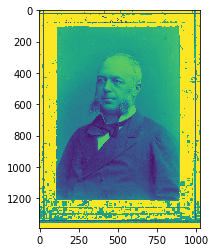

In [19]:
plt.imshow(gray)

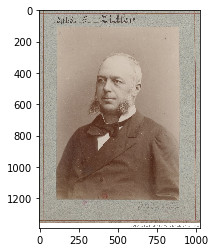